In [1]:
from medmnistc.augmentation import AugMedMNISTC
from medmnistc.corruptions.registry import CORRUPTIONS_DS

from PIL import Image

import torchvision.transforms as transforms
import numpy as np
import os

### Augmentation

speckle_noise


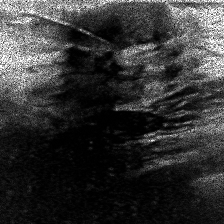

In [9]:
dataset = "breastmnist"
medmnist_path = "/mnt/data/datasets/medmnist" # PATH TO THE CLEAN IMAGES

train_corruptions = CORRUPTIONS_DS[dataset]
path = os.path.join(medmnist_path,f'{dataset}_224.npz')
train_images = np.load(path)['train_images']

aug = AugMedMNISTC(train_corruptions, verbose=True) 

img = Image.fromarray(train_images[0])
Image.fromarray(aug(img))

## Integrate into transforms.Compose

In [24]:
dataset = "dermamnist"
medmnist_path = "/mnt/data/datasets/medmnist" # PATH TO THE CLEAN IMAGES

train_corruptions = CORRUPTIONS_DS[dataset]
path = os.path.join(medmnist_path,f'{dataset}_224.npz')
train_images = np.load(path)['train_images']

MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

aug_compose = transforms.Compose([
    AugMedMNISTC(train_corruptions),
    transforms.ToTensor(),
    transforms.Normalize(mean=MEAN, std=STD)
])

img = Image.fromarray(train_images[0])
aug_compose(img) # As before, but we have a normalized tensor now.

tensor([[[ 2.2489,  2.1119,  1.5810,  ...,  1.1872,  2.2489,  2.1119],
         [ 0.6563,  1.8550,  2.2489,  ...,  1.8550,  2.2489,  1.4440],
         [ 1.4440,  1.3242,  1.7180,  ...,  1.4440,  2.2489,  2.2489],
         ...,
         [ 1.4440,  1.4440,  0.6563,  ...,  1.3242,  0.7933, -0.0116],
         [ 1.3242,  1.3242,  0.3994,  ...,  1.1872,  1.1872,  1.1872],
         [ 2.2489,  0.5193,  1.4440,  ...,  2.2489,  2.1119,  1.3242]],

        [[ 1.4832,  1.7458, -0.5476,  ...,  0.5378, -0.0049,  1.4832],
         [ 0.2577,  0.2577,  1.7458,  ..., -0.2850, -0.1450, -0.5476],
         [ 1.0805,  2.0259,  0.6604,  ...,  0.3978,  0.2577,  0.5378],
         ...,
         [ 0.6604,  0.9405,  0.2577,  ...,  1.2031,  0.6604,  1.2031],
         [-0.2850,  0.2577,  2.0259,  ...,  1.7458, -0.2850,  0.6604],
         [ 0.8004,  0.8004,  0.5378,  ..., -0.5476,  0.5378, -0.2850]],

        [[ 0.3393,  1.5594,  0.7576,  ...,  0.7576,  1.6988,  2.3611],
         [ 2.5006,  1.1585,  1.5594,  ...,  0